In [91]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
%matplotlib inline
sns.set_style('darkgrid') # set the grid style for the seaborn plots

In [92]:
pd.set_option('display.float_format', lambda x: '%.5f' % x) # suppress scientific notation in pandas

In [93]:
df = pd.read_excel('EPL Player Stats All Time.xlsx', index_col=0)

In [94]:
#df.set_index('Player_ID', inplace=True) # set column 'Player_ID' as index w/o creating a duplicate
df.index = df['Player_ID']
df.index.names = ['ID']
#df.dropna(inplace=True)
df.fillna(0, inplace=True)
#df.isnull().sum()

In [95]:
a = df['Position'].reset_index(drop='True').tolist()
a = set(a)
print(a)

{0, 'EPL Average 2018 - 2019', 'EPL Average 2020 - 2021', 'FW', 'GK', 'MFFW', 'DFFW', 'EPL Average 2019 - 2020', 'MF', 'DF', 'EPL Average 2017 - 2018', 'FWDF', 'FWMF', 'MFDF', 'DFMF'}


In [96]:
df['Yellow Cards'] = -1*df['Yellow Cards']
df['Red Cards'] = -1*df['Red Cards']
df['Fouls Committed'] = -1*df['Fouls Committed']
df['Turnovers'] = -1*df['Turnovers']

In [97]:
# FILTERS

df = df[df['90s Played'] >= 6] # drop players who have no appearances
#df = df[df['Position'] == 'GK'].reset_index(drop='True') # Filter by a Single Position
df = df[(df['Position'] == 'DF') | (df['Position'] == 'DFMF') | (df['Position'] == 'DFFW')].reset_index(drop='True') # Filter by Multiple Positions

In [98]:
#df.columns.values.tolist()

In [99]:
# PARAMETERS - Select 13 and include PLAYER and TEAM ----------------------------------------------------------------------------------------------------------------------------------------------------------------

#Goalkeepers

#df = df[['Player_ID','GK Saves','GK Save %','GK Post-Shot xG Against per Shot on Target','GK Post-Shot xG Against PlusMinus', 'GK Long Passes Completed', 'GK Long Pass Preference %', 'GK Average Pass Length (Yd)', 'GK Long Goal Kick Preference %','GK Average Goal Kick Length (Yd)', 'GK Sweeping Actions', 'GK Average Sweeping Action Distance From Goal (Yd)']]

#Centerbacks

#df = df[['Player_ID','Pass Completion %', 'Pressures','Fouls Committed','Tackle Success %','Tackles Won','Interceptions','Aerials Won','Aerial Win %','Short Passes Completed','Long Passes Completed','Goal Contributions per 90']]

#Fullbacks

df = df[['Player_ID','Tackles + Interceptions','Pressures', 'Deep Progressions','Share of Touches in the Final Third %','Pass Completion %','Goal Contributions per 90','Dribbles Completed', 'Turnovers', 'Aerials Won', 'Crosses Completed into Opposition Box', 'Tackle Success %']]

#Midfielders

#df = df[['Player_ID', 'Passes Completed','Pass Completion %','Deep Progressions','xA', 'Goal Contributions per 90', 'Dribbles Completed','Fouls Won','Turnovers','Successful Pressures', 'Pressures', 'Tackles + Interceptions']]

#Attacking Midfielders/Wingers

#df = df[['Player_ID', 'Non-Penalty xG','Shots', 'Touches In Opposition Box', 'Pass Completion %', 'Crosses Completed into Opposition Box', 'xA','Fouls Won','Dribbles Completed','Turnovers', 'Successful Pressures', 'Goals per Shot']]

#Strikers

#df = df[['Player_ID','Non-Penalty xG','Goals - xG','Shots','Touches In Opposition Box','Shots per Touch', 'xA','Successful Pressures','Pressures','Aerials Won','Dribbles Completed','Non-Penalty xG per Shot']]


In [100]:
#Principal Component Analysis (PCA)

#df.describe().loc['std']
#It seems that there's a better way to perform cluster analysis, that is to keep all the metrics that we want to assess but to give each metric some weight (that is, a level of importance) based on how much variation it accounts for. This is exactly what Principal Component Analysis (PCA) does.

#PCA is a dimensionality reduction technique. It creates new features/metrics using linear combinations of the original features/metrics, that is, it gives a weight to each of the original metrics based on how much variation they explain. It combines these weighted metrics and forms a new feature. In this way, PCA keeps takes into account all the initial metrics but it also gives certain weightage to each of those.

#These new features form the axes of the PCA plot and are known as Principal Components (PCs). In most of the cases, the first two PCs account for the vast majority of the variation that is observed in the data. Therefore, PC1 and PC2 can provide a really good approximation of the variation in the data for our cluster analysis. Also, the variation observed on the PC1 axis is more significant than the variation observed on the PC2 axis. Visualising the variation in the data also becomes very easy as PCA can reduce the dimensionality to two or three dimensions, without any significant loss of variation.

#dft = df[['Player_ID','Non-Penalty xG', 'xA','Dribbles Completed']] az column isteniyorsa
dft = df
df1 = dft.drop(['Player_ID'], axis = 1)


In [101]:
#Feature scaling

scaler = StandardScaler()
scaler.fit(df1) # compute the mean and standard deviation to be used for later scaling
#StandardScaler(copy=True, with_mean=True, with_std=True)
scaled_features = scaler.transform(df1)
#scaled_data = pd.DataFrame(data=scaled_features, columns=df1.columns)
#scaled_data.head(3)

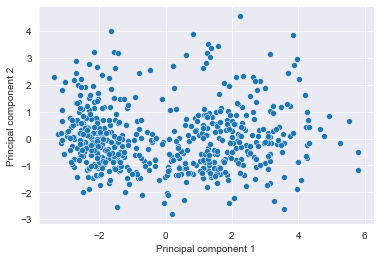

In [102]:
#  Implementing PCA

#For our second cluster analysis, we will find and use the first two PCs. In most cases, PC1 and PC2 account for the vast majority of the variation in the data (we will find out the exact proportion of variation that each of the two PCs account for in our case).

#We will also use the loading scores (loading scores are the weights assigned to each of the initial metrics) of PC1 to see which of the initial metrics explain a lot of the variation in the data. The metrics with higher loading scores or weights are the ones which help differentiate and cluster players better.

#Furthermore, we will use K means clustering on these new features produced by PCA to cluster the central midfielders. We will also use the 'elbow method' to find a suitable value for the number of clusters (K).

pca = PCA(n_components=2)
pca.fit(scaled_features) # Now, we will find the PCs using the fit method 
pca_data = pca.transform(scaled_features) # Let's apply rotation and dimensionality reduction to transform the data to its first two PCs.

sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1])
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.show() #Earlier, it was difficult to visualise our data since had multiple dimensions (more than three). PCA helped us bring this high dimensional data to the two-dimensional space. Let's plot our data!

#Variation observed along the PC1 axis is more significant than the variation observed along the PC2 axis. We will plot this data again after we perform clustering on this PCA data.

In [103]:
#  Interpreting the components
#Let's have a look at the metrics which were the most important in affecting which cluster a player was assigned to.

pc1_loading_scores = pd.DataFrame(data=pca.components_[0], index=df1.columns, columns=['PC1 Loading Score'])
pc1_loading_scores.sort_values(by='PC1 Loading Score', ascending=False, inplace=True)
pc1_loading_scores

# Negative loading scores indicate that the metric does not explain much variation in the date. 
# Like all machine learning and data analysis, clustering is dependent on the needs of your team. Communication of goals needs to occur or else clustering can only maintain a generic, topline level of usefulness rather than being specific to the needs of the club.

,PC1 Loading Score
Share of Touches in the Final Third %,0.42786
Pressures,0.37328
Crosses Completed into Opposition Box,0.36248
Dribbles Completed,0.34814
Tackles + Interceptions,0.25406
Goal Contributions per 90,0.16810
Deep Progressions,0.16060
Tackle Success %,-0.10472
Pass Completion %,-0.22795
Aerials Won,-0.28271


In [104]:
pc2_loading_scores = pd.DataFrame(data=pca.components_[1], index=df1.columns, columns=['PC2 Loading Score'])
pc2_loading_scores.sort_values(by='PC2 Loading Score', ascending=False, inplace=True)
pc2_loading_scores

,PC2 Loading Score
Deep Progressions,0.66005
Pass Completion %,0.57956
Goal Contributions per 90,0.35426
Dribbles Completed,0.11438
Share of Touches in the Final Third %,0.03851
Crosses Completed into Opposition Box,0.02437
Turnovers,-0.02190
Tackle Success %,-0.03714
Aerials Won,-0.04741
Pressures,-0.17999


In [105]:
# KMeans clustering 

# Let's first create a dataframe for the PCA data. - higher values indicate better performance according to positional metrics
pca_df = pd.DataFrame(data=pca_data, index=dft['Player_ID'], columns=['PC 1', 'PC 2'])
pca_df.reset_index(inplace=True) # reset the index
pca_df.head(3)

#We know that our clusters are significantly accurate when the variation within each cluster is as little as possible. Each time we add a new cluster, the total variation within each cluster is smaller than before. And when there is only one point per cluster, the variation is 0. The inertia attribute of a K means clustering model represents the sum of squared distances of samples to their closest cluster center. Sum of squared distances is a measure of variation. If we plot the inertia per value of K, we will notice that after a certain K value, the inertia doesn't decrease as quickly as it did before. This K value is called the 'elbow point' sometimes, and it is a suitable value for K in our K means clustering analysis.Let's apply the elbow method and find a suitable K value for our cluster analysis!

#First of all, we will scale the PCA data.
scaler = StandardScaler()
scaler.fit(pca_df.drop('Player_ID', axis=1)) # compute the mean and standard deviation to be used for later scaling
scaled_pca_features = scaler.transform(pca_df.drop('Player_ID', axis=1)) # perform standardisation by centering and scaling
scaled_pca_data = pd.DataFrame(data=scaled_pca_features, columns=pca_df.drop('Player_ID', axis=1).columns) # store the scaled features in a datafram


In [106]:
#Elbow method

scaler = StandardScaler()
scaler.fit(pca_df.drop('Player_ID', axis=1)) # compute the mean and standard deviation to be used for later scaling
scaled_pca_features = scaler.transform(pca_df.drop('Player_ID', axis=1)) # perform standardisation by centering and scaling
scaled_pca_data = pd.DataFrame(data=scaled_pca_features, columns=pca_df.drop('Player_ID', axis=1).columns) # store the scaled features in a datafram

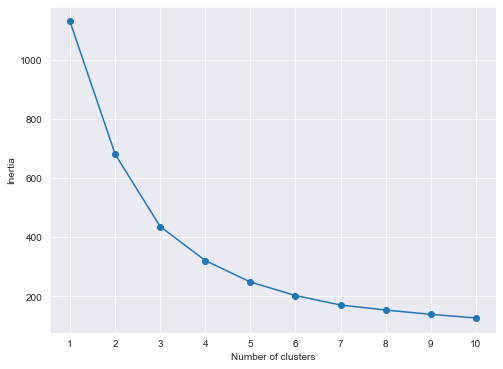

In [107]:
#Prior to applying the elbow method, we have to decide a range of possible number of clusters. For our cluster analysis, let's take a range of 1 to 10 and see the results.

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X=scaled_pca_data)
    inertia.append(kmeans.inertia_)
elbow_df = pd.DataFrame({'Number of clusters':range(1, 11), 'Inertia':inertia})

plt.figure(figsize=(8,6))
plt.plot(elbow_df['Number of clusters'], elbow_df['Inertia'], marker='o')
plt.xlabel('Number of clusters')
plt.xticks(np.arange(1, len(inertia)+1, 1))
plt.ylabel('Inertia')
plt.show()

In [108]:
# KMeans cluster creation

kmeans = KMeans(n_clusters=3)
kmeans.fit(X=scaled_pca_data)
pca_df['Cluster Label'] = kmeans.labels_ # add cluster labels for players as a new column to the pca_df dataframe
print(pca_df.columns.tolist())


['Player_ID', 'PC 1', 'PC 2', 'Cluster Label']


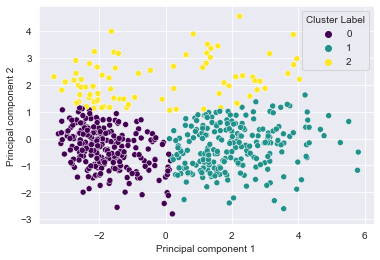

In [109]:
# Analysis and visualisation

sns.scatterplot(x='PC 1', y='PC 2', data=pca_df, hue='Cluster Label', palette='viridis')
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.show()

In [110]:
# Now, let's check out all the three clusters and the players they include.
pca_cluster_0 = pca_df[pca_df['Cluster Label']==0]['Player_ID']
pca_cluster_1 = pca_df[pca_df['Cluster Label']==1]['Player_ID']
pca_cluster_2 = pca_df[pca_df['Cluster Label']==2]['Player_ID']
#pca_cluster_3 = pca_df[pca_df['Cluster Label']==3]['Player_ID']
#pca_cluster_4 = pca_df[pca_df['Cluster Label']==4]['Player_ID']

In [111]:
print('\nCluster 0 players:\n')
print(pca_cluster_0)
print('\n\n')
print('Cluster 1 players:\n')
print(pca_cluster_1)
print('\n\n')
print('Cluster 2 players:\n')
print(pca_cluster_2)
#print('\n\n')
#print('Cluster 3 players:\n')
#print(pca_cluster_3)
#print('\n\n')
#print('Cluster 4 players:\n')
#print(pca_cluster_4)



Cluster 0 players:

1              Nathan Aké_Bournemouth_2017 - 2018
7          Eric Bailly_Manchester Utd_2017 - 2018
14              Miguel Britos_Watford_2017 - 2018
15                     Bruno_Brighton_2017 - 2018
16                Gary Cahill_Chelsea_2017 - 2018
                          ...                    
548       Pascal Struijk_Leeds United_2020 - 2021
550           James Tarkowski_Burnley_2020 - 2021
556    Jannik Vestergaard_Southampton_2020 - 2021
561             Adam Webster_Brighton_2020 - 2021
562                Ben White_Brighton_2020 - 2021
Name: Player_ID, Length: 253, dtype: object



Cluster 1 players:

0      Patrick van Aanholt_Crystal Palace_2017 - 2018
3        Trent Alexander-Arnold_Liverpool_2017 - 2018
4                   Marcos Alonso_Chelsea_2017 - 2018
5                  Serge Aurier_Tottenham_2017 - 2018
8                 Leighton Baines_Everton_2017 - 2018
                            ...                      
554              Conor Townsend_West B

In [112]:
#The only thing left is to prepare one final dataset/dataframe that we'll give to the team staff concerned with recruitment. This final dataset will be helpful to them during the recruitment process and all other relevant activities. We will keep only those metrics in this final dataset that the front office staff wants to see (in our case, the metrics that I want to see).

In [113]:
final_data = pd.merge(left=pca_df[['Player_ID','PC 1','PC 2', 'Cluster Label']],
                      right=df,
                      how='inner', on='Player_ID')

In [114]:
final_data = final_data.sort_values(by='PC 1', ascending=False)
#final_data.sort_values(by='PC 1', ascending=False).head(10)
final_data.reset_index(drop=True, inplace=True)
final_data

,Player_ID,PC 1,PC 2,Cluster Label,Tackles + Interceptions,Pressures,Deep Progressions,Share of Touches in the Final Third %,Pass Completion %,Goal Contributions per 90,Dribbles Completed,Turnovers,Aerials Won,Crosses Completed into Opposition Box,Tackle Success %
0,Jacob Murphy_Newcastle Utd_2020 - 2021,5.80234,-0.50504,1,3.10000,18.70000,3.54331,37.07627,63.90000,0.23000,2.76000,-5.17000,0.23000,0.46000,67.69663
1,Rúben Vinagre_Wolves_2019 - 2020,5.77926,-1.18213,1,4.86000,16.30000,3.09022,29.20863,74.70000,0.00000,2.50000,-7.36000,0.83000,0.83000,83.41346
2,Tariq Lamptey_Brighton_2019 - 2020,5.51544,0.63540,1,2.77000,14.00000,4.14626,30.40293,73.60000,0.15000,3.54000,-4.77000,0.62000,0.77000,50.00000
3,Serge Aurier_Tottenham_2018 - 2019,5.26127,-0.15148,1,4.60000,20.80000,3.74151,32.40223,73.80000,0.32000,1.27000,-4.13000,1.43000,1.11000,75.86957
4,Ricardo Pereira_Leicester City_2019 - 2020,4.91025,0.85159,1,5.82000,20.10000,7.37922,29.82063,80.70000,0.18000,2.11000,-4.13000,1.36000,0.32000,65.26946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,Yerry Mina_Everton_2020 - 2021,-3.12586,0.64488,0,1.76000,6.81000,2.69000,2.22822,90.50000,0.11000,0.00000,-0.26000,3.24000,0.00000,87.78626
561,Andreas Christensen_Chelsea_2020 - 2021,-3.13840,0.21434,0,2.75000,5.05000,2.53000,1.25571,93.10000,0.00000,0.00000,-0.33000,2.86000,0.00000,80.00000
562,Michael Keane_Everton_2019 - 2020,-3.15150,-0.18373,0,2.29000,6.69000,2.54000,2.43902,84.60000,0.07000,0.00000,-0.22000,4.72000,0.00000,77.41935
563,Gary Cahill_Crystal Palace_2020 - 2021,-3.22580,0.17714,0,1.23000,4.85000,2.08270,3.38068,84.80000,0.08000,0.08000,-0.23000,3.85000,0.00000,66.66667
